In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import networkx as nx
from scipy import stats 

In [2]:
def SerieToNetMod(serie):
    arrG1=[]
    G=nx.Graph()
    for Na in range (len(serie)):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,len(serie)):
#             print(Na,Nb,Na-Nb)
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
                
    
    for i in range(len(serie)):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
    
    return(G)

In [3]:
def extractSeries(path):
    series = os.listdir(path)
    series.sort()
    series = [serie for serie in series if serie[-1] == 't']
    return(series)

In [18]:
def analizeSeries(series, pathSeries,length):
    listOfStats=[]
    c=1
    for file in series:
        serie = np.loadtxt(pathSeries + file)
        try:
            serie = serie[:,1]
        except:
            pass
        serie = serie[int(len(serie)/2):int((len(serie)/2))+length]
        dic = {}
        graph = SerieToNetMod(serie)
        degrees = [graph.degree(i) for i in graph.nodes()]
        slope, intercept, r_value, p_value, std_err = stats.linregress(serie,degrees)
        name = file[4:8]+'_'+ str(c)
        genPlots(serie,degrees,slope,intercept,pathSeries,name)
   
        dic['name'] = file[:-4]
        print(file[4:8])
        dic['H'] = float(file[4:8])
        dic['slope'] = slope
        dic['intercept'] = intercept
        dic['r_value'] = r_value
        listOfStats.append(dic)
        c+=1
        
    return(listOfStats)

In [5]:
def genPlots(serie,degrees,slope,intercept,path,name):
    
    x = np.linspace(np.min(serie),np.max(serie),1000)
    y = slope * x + intercept
    label = 'y=' + str(slope) + 'x' + '+' + str(intercept)
    plt.style.use('seaborn-darkgrid')
    fig=plt.figure()
    axes=fig.add_axes([0.1,0.1,2,2])
    label = 'y=' + str(np.round(slope,4)) + 'x' + '+' + str(np.round(intercept,4))
    p1 = axes.plot(serie,degrees,'*r')
    p1 = axes.plot(x,y,'-k')
    plt.ylabel('Degree', fontsize=20)
    plt.xlabel('Magnidute',fontsize=20)
    plt.legend(['Samples',label],fontsize=16, loc= 'upper left')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(path+'Plots/'+name+'_kdPlot.jpg', bbox_inches = 'tight')
    

In [6]:
path = './fbmGEn/'
series = extractSeries(path)

In [ ]:
df = analizeSeries(series,path,10000)

In [8]:
df = pd.DataFrame(df)

In [9]:
df.head()

,name,H,slope,intercept,r_value
0,fbm_0.05_1,0.05,1.222886,6.608469,0.403671
1,fbm_0.05_10,0.05,1.367992,10.269208,0.415977
2,fbm_0.05_11,0.05,0.576707,6.987765,0.266773
3,fbm_0.05_12,0.05,1.116684,8.257321,0.377755
4,fbm_0.05_13,0.05,0.705701,8.300744,0.297520


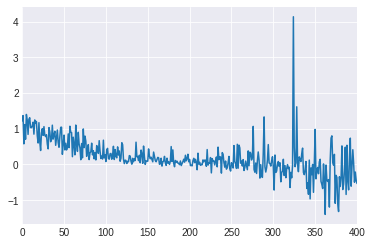

In [10]:
df.slope.plot()

In [11]:
dfG = df.groupby('H').mean().reset_index()

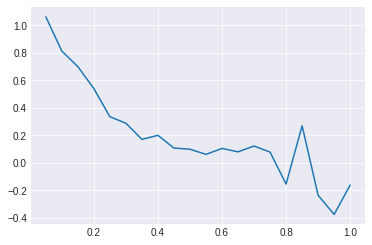

In [12]:
plt.plot(dfG['H'],dfG['slope'])

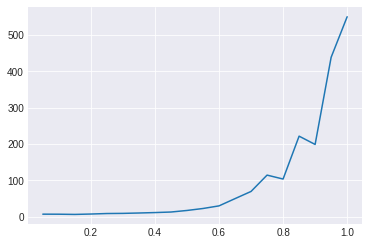

In [13]:
plt.plot(dfG['H'],dfG['intercept'])

In [ ]:
df2 = analizeSeries(series,path,3000)
df2 = pd.DataFrame(df2)

In [22]:
df2.head()

,name,H,slope,intercept,r_value
0,fbm_0.05_1,0.05,1.709128,4.020750,0.494499
1,fbm_0.05_10,0.05,1.012403,6.416765,0.367108
2,fbm_0.05_11,0.05,1.480987,-6.846941,0.454448
3,fbm_0.05_12,0.05,1.265109,-0.567068,0.415630
4,fbm_0.05_13,0.05,1.465864,28.365518,0.449276


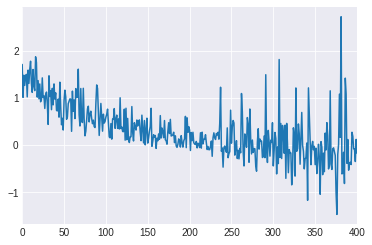

In [23]:
df2.slope.plot()

In [24]:
dfG2 = df2.groupby('H').mean().reset_index()

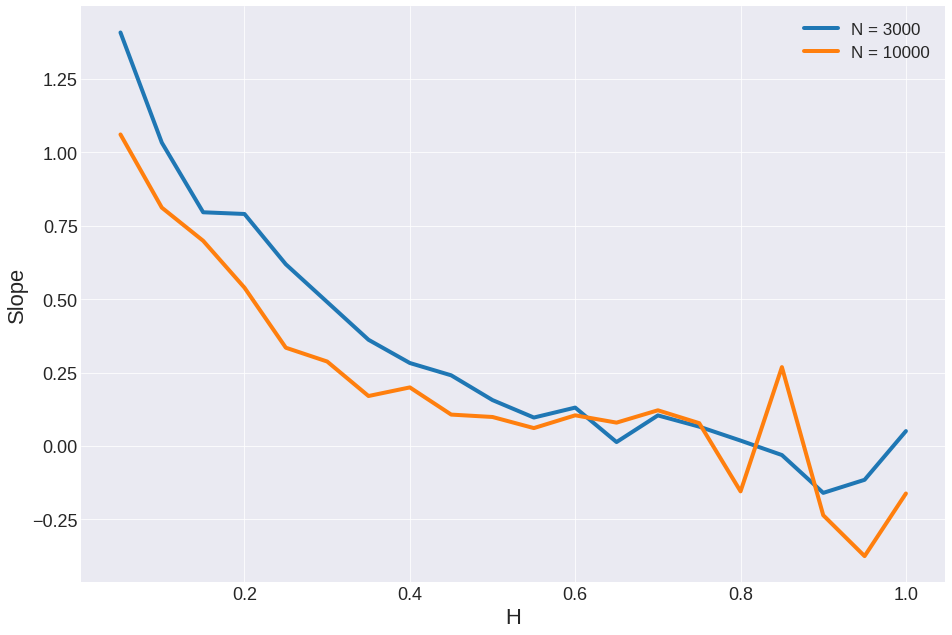

In [45]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dfG2['H'],dfG2['slope'],lw=4)
plt.plot(dfG['H'],dfG['slope'], lw=4)
plt.legend(['N = 3000','N = 10000'],fontsize = 17)
plt.xlabel('H',fontsize=22)
plt.ylabel('Slope',fontsize=22)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

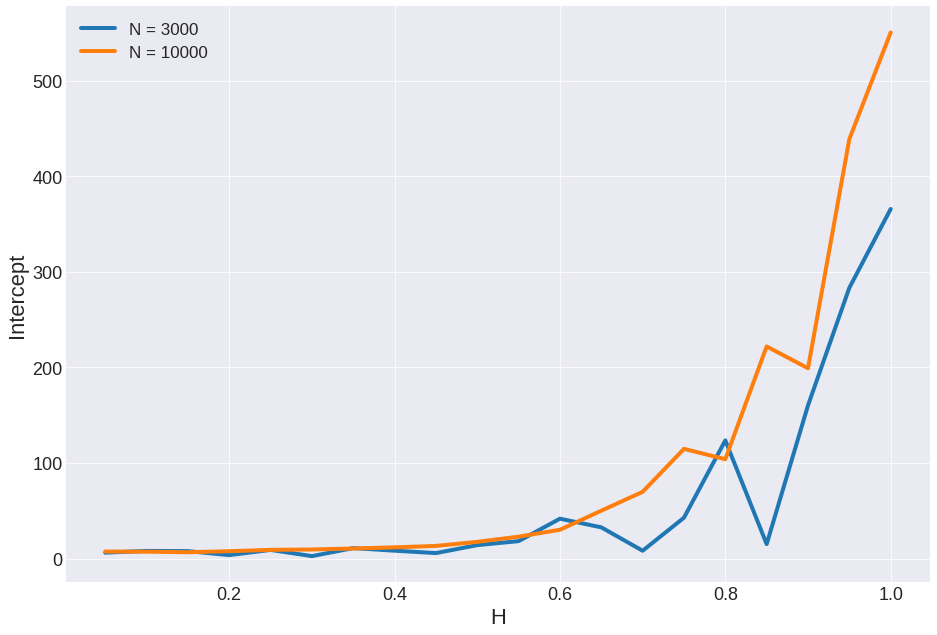

In [47]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dfG2['H'],dfG2['intercept'],lw=4)
plt.plot(dfG['H'],dfG['intercept'],lw=4)
plt.xlabel('H',fontsize=22)
plt.legend(['N = 3000','N = 10000'],fontsize = 17)
plt.ylabel('Intercept',fontsize=22)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);